In [123]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [124]:
df=pd.read_csv(r"C:\Users\nonit\OneDrive\Desktop\Crystal_structure.csv")
df.head(10)

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic
5,AcBO3,Ac,B,False,0,0,1.12,1.12,0.27,1.1,2.04,0.0,1.624662,-1.117357,1.067011,-,0.192857,cubic
6,AcBaO3,Ac,Ba,False,0,0,1.12,1.12,1.35,1.1,0.89,0.0,2.640094,-3.806786,0.647967,-,0.964286,orthorhombic
7,AcBeO3,Ac,Be,False,0,0,1.12,1.12,0.45,1.1,1.57,0.0,1.803349,-1.676929,0.963194,-,0.321429,cubic
8,AcBiO3,Ac,Bi,False,0,0,1.12,1.12,0.90,1.1,2.02,0.0,2.215655,-2.425857,0.774743,-,0.642857,orthorhombic
9,AcCaO3,Ac,Ca,False,0,0,1.12,1.12,1.00,1.1,1.00,0.0,2.318139,-3.040286,0.742462,-,0.714286,orthorhombic


In [125]:
df.replace('-', np.nan, inplace=True)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Lowest distortion Encoded'] = label_encoder.fit_transform(df['Lowest distortion'])
df['A'] = label_encoder.fit_transform(df['A'])
df['B'] = label_encoder.fit_transform(df['B'])
df['In literature'] = label_encoder.fit_transform(df['In literature'])

from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(missing_values=4, strategy='most_frequent')

df_impute_1 = df[['τ','v(A)','v(B)']]
df_impute_2 = df[['Lowest distortion Encoded']]

X1 = df_impute_1.values
X2 = df_impute_2.values

X_imputed_1 = imputer1.fit_transform(X1)
X_imputed_2 = imputer2.fit_transform(X2) 

df[['τ','v(A)','v(B)']] = X_imputed_1
df[['Lowest distortion Encoded']] = X_imputed_2

df.head(10)

,Compound,A,B,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion,Lowest distortion Encoded
0,Ac2O3,0,0,0,0.0,0.0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,2.503861,0.800000,cubic,0
1,AcAgO3,0,1,0,0.0,0.0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,2.503861,0.678571,orthorhombic,1
2,AcAlO3,0,2,0,0.0,0.0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,2.503861,0.385714,cubic,0
3,AcAsO3,0,3,0,0.0,0.0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,2.503861,0.371429,orthorhombic,1
4,AcAuO3,0,4,0,0.0,0.0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,2.503861,0.664286,orthorhombic,1
5,AcBO3,0,5,0,0.0,0.0,1.12,1.12,0.27,1.1,2.04,0.0,1.624662,-1.117357,1.067011,2.503861,0.192857,cubic,0
6,AcBaO3,0,6,0,0.0,0.0,1.12,1.12,1.35,1.1,0.89,0.0,2.640094,-3.806786,0.647967,2.503861,0.964286,orthorhombic,1
7,AcBeO3,0,7,0,0.0,0.0,1.12,1.12,0.45,1.1,1.57,0.0,1.803349,-1.676929,0.963194,2.503861,0.321429,cubic,0
8,AcBiO3,0,8,0,0.0,0.0,1.12,1.12,0.90,1.1,2.02,0.0,2.215655,-2.425857,0.774743,2.503861,0.642857,orthorhombic,1
9,AcCaO3,0,9,0,0.0,0.0,1.12,1.12,1.00,1.1,1.00,0.0,2.318139,-3.040286,0.742462,2.503861,0.714286,orthorhombic,1


In [126]:
y = df['Lowest distortion Encoded']
df.drop(columns = ['Lowest distortion', 'Lowest distortion Encoded', 'Compound','In literature','A','B'], inplace=True)
X = df

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
0,0.000000,0.00000,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,0.800000
1,0.000000,0.00000,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,0.678571
2,0.000000,0.00000,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,0.385714
3,0.000000,0.00000,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,0.371429
4,0.000000,0.00000,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,0.664286
...,...,...,...,...,...,...,...,...,...,...,...,...
5324,1.000000,5.00000,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,0.442857
5325,1.600638,2.25377,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,0.642857
5326,1.600638,2.25377,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,0.678571
5327,1.600638,2.25377,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,0.528571


In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=5000).fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100
print(f"Accuracy Score using Logistic Regression: {acc:.2f}%")

Accuracy Score using Logistic Regression: 63.32%


34/34 [==============================] - 0s 8ms/step - loss: 0.7388 - accuracy: 0.7101
Test accuracy with adam: 71.01 %
Test loss with adam: 0.7388


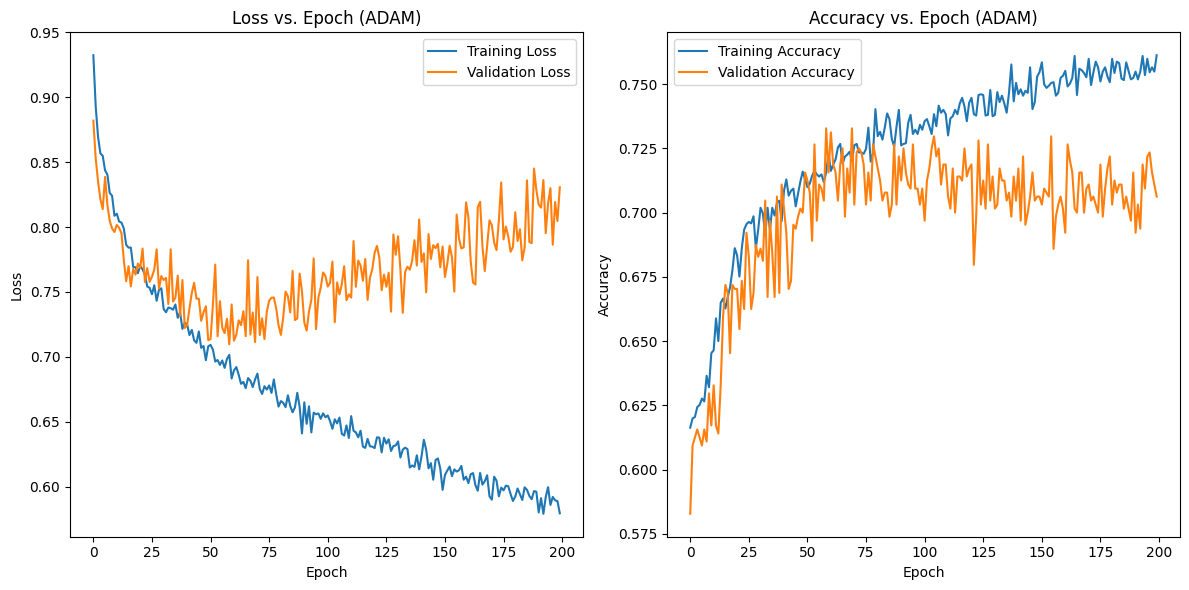

34/34 [==============================] - 0s 2ms/step - loss: 0.8056 - accuracy: 0.6660
Test accuracy with sgd: 66.60 %
Test loss with sgd: 0.8056


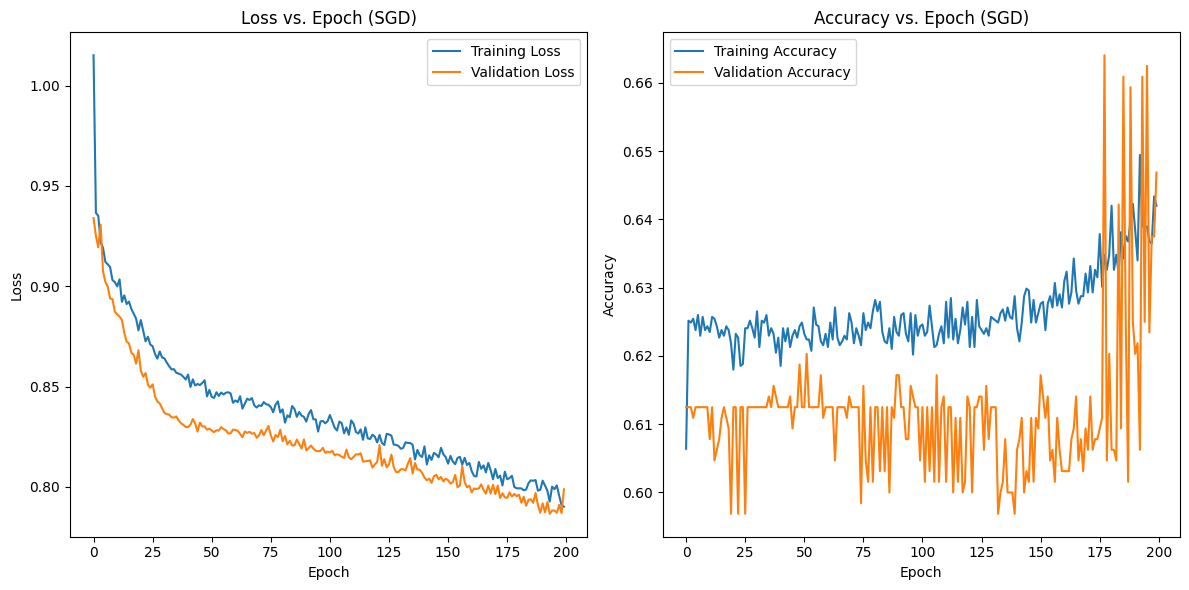

34/34 [==============================] - 0s 1ms/step - loss: 0.7282 - accuracy: 0.7111
Test accuracy with rmsprop: 71.11 %
Test loss with rmsprop: 0.7282


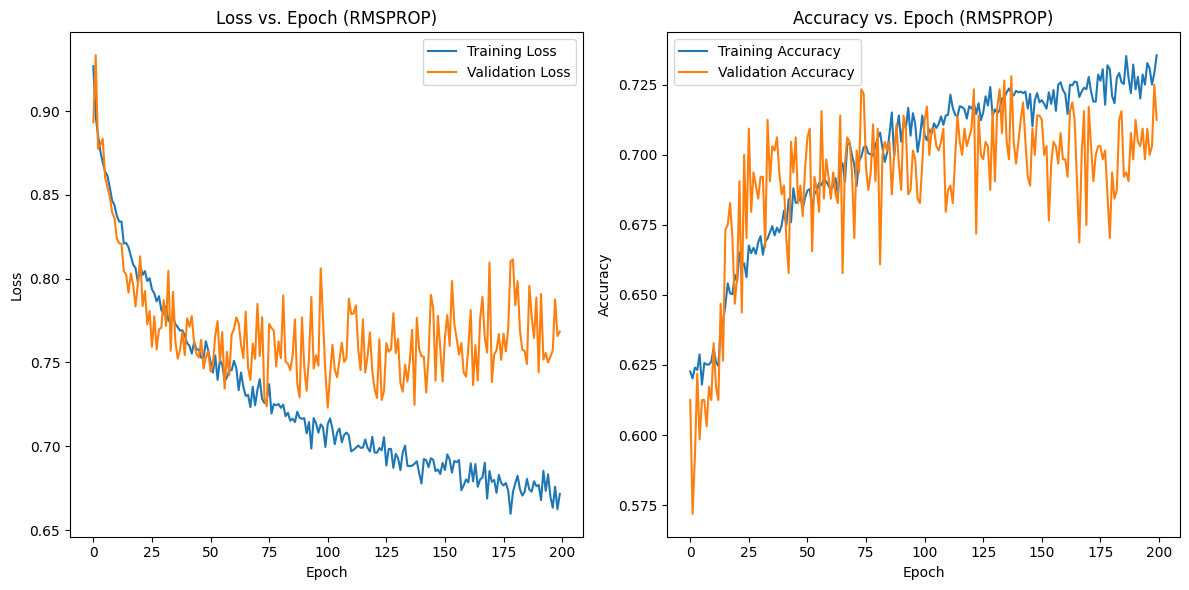

34/34 [==============================] - 0s 5ms/step - loss: 0.9277 - accuracy: 0.6088
Test accuracy with adadelta: 60.88 %
Test loss with adadelta: 0.9277


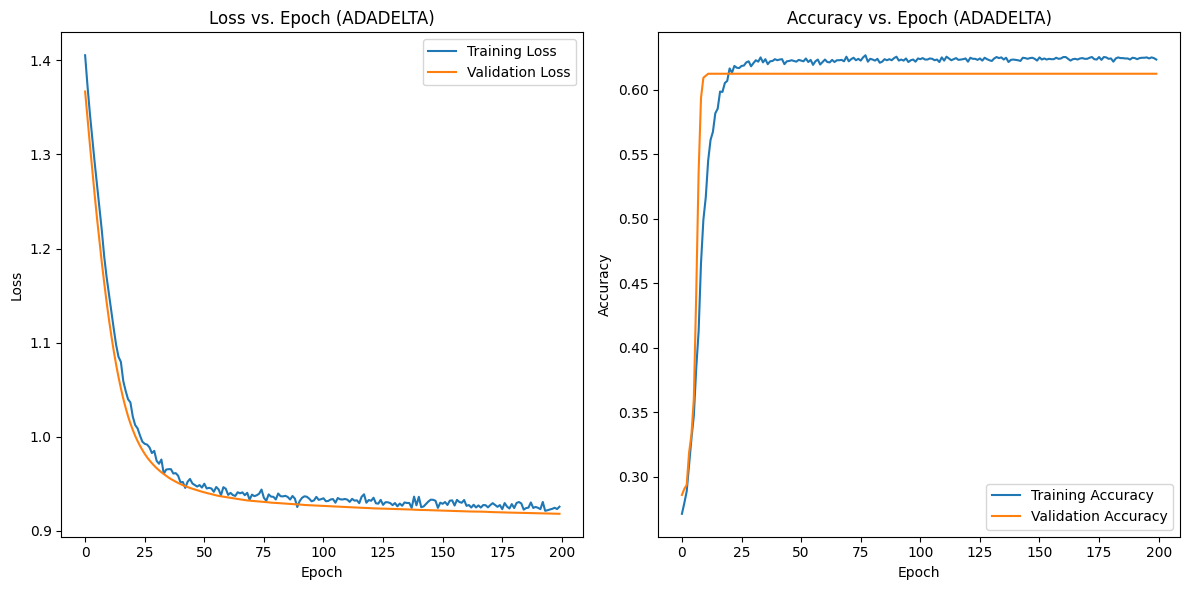

In [130]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta

optimizers = ['adam', 'sgd','rmsprop','adadelta']
for optimizer_name in optimizers:
    
    keras.backend.clear_session()
    
    mod = Sequential()
    mod.add(Dense(10, activation='relu'))
    mod.add(Dropout(0.1))
    mod.add(Dense(190, activation='relu'))
    mod.add(Dropout(0.1))
    mod.add(Dense(120, activation='relu'))
    mod.add(Dropout(0.1))
    mod.add(Dense(150, activation='relu'))
    mod.add(Dense(4, activation='softmax'))

    if optimizer_name == 'adam':
        optimizer = Adam()
    elif optimizer_name == 'sgd':
        optimizer = SGD()
    elif optimizer_name == 'rmsprop':  
        optimizer = RMSprop()
    elif optimizer_name == 'adadelta':  
        optimizer = Adadelta()

    mod.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    history = mod.fit(X_train, y_train, epochs=200, batch_size=43, validation_data=(X_val, y_val),verbose=0)

    test_loss, test_acc = mod.evaluate(X_test, y_test)

    print(f'Test accuracy with {optimizer_name}: {test_acc*100:.2f} %')
    print(f'Test loss with {optimizer_name}: {test_loss:.4f}')


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss vs. Epoch (' + optimizer_name.upper() + ')')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy vs. Epoch (' + optimizer_name.upper() + ')')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()